# **Preproccess Data**

### **Explorasi Data**

In [66]:
# menyiapkan library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re


In [67]:
# ambil data
df = pd.read_csv("Data HateSpeech.csv")

# mengecek isi data
df.head(10)

,username,comment,label
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama
5,pshycosocial_,orang jelek kalo tarik tambang pasti kalah ter...,Ras
6,yangmanatautau,Lelaki melayu kuat betul insecure dengan saiz ...,Ras
7,Kyurus,@lulusikucing @otramercano Kan emg negara isla...,Netral
8,fifteennisa,@emerson_yuntho @geloraco Kadrun penyembah bal...,Agama
9,bapakkautbc_,Etdah kite2 lg yg disalahin pdhl emg bencong i...,Netral


In [68]:
df.label.value_counts()

label
Netral    836
Ras       601
Agama     563
Name: count, dtype: int64

### **Seleksi Fitur**

In [69]:
# menghilangkan fitur yang tidak dibutuhkan
df.drop(columns="username", inplace=True)

# melihat isi data
df.head()

,comment,label
0,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,Udah jelek brengsek pula,Ras
2,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama


### **Cleaning**

**Nilai yang Hilang**

In [70]:
df.label.unique()

array(['Netral', 'Ras', 'Agama', nan], dtype=object)

In [71]:
# mengecek apakah ada data yang hilang
df.isna().sum()

comment    3
label      4
dtype: int64

In [72]:
df.dropna(inplace=True)

df.isna().sum()

comment    0
label      0
dtype: int64

In [73]:
df.label.unique()

array(['Netral', 'Ras', 'Agama'], dtype=object)

**Data yang Terduplikat**

In [74]:
df[df.duplicated].count()

comment    54
label      54
dtype: int64

In [75]:
df[df.duplicated].head(8)

,comment,label
143,"@VIVAcoid Sudahlah,Dia mnjabat sbg menteri saj...",Netral
144,@banjarbase Agama jgn dijadikan tolak ukur lag...,Netral
269,@yonkpaws Jelek klodia ðŸ˜”ðŸ˜”,Ras
398,Ini contoh Islam yg ga bener + contoh kristen ...,Agama
452,Ka'bah islam anjing edan. Islam agama salah. h...,Agama
460,@iihjiji @GlHindu @YaqutCQoumas Selain agama g...,Agama
462,ANAK KAFIR INI!!! cuman ngelike aja padahalâ€¦...,Agama
463,Trus tak berhijab kok di-bully dan dipersekusi...,Agama


### **Case Folding**

In [76]:
# akan mengembalikan text yang sudah di case folding
def case_folding(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\n+', '', text)
    text = re.sub(r'\r+', '', text)
    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U00010000-\U0010ffff"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    return text.lower()

df.comment = df.comment.apply(case_folding)

df.comment.head()


0     lingkunganmu keknya punya pemahaman kl anak p...
1                             udah jelek brengsek pula
2    lucunya penghuni negeri ini selalu di hiasi da...
3    yang jelek  miskin udah pasti bukan kristen  t...
4     mereka memanfaatkan kebodohan kadrun melalui ...
Name: comment, dtype: object

### **Tokenize**

In [77]:
# akan mengembalikan text yang sudah di tokenize
def tokenize(text):
    return word_tokenize(text)

df.comment = df.comment.apply(tokenize)
df.comment.head()

0    [lingkunganmu, keknya, punya, pemahaman, kl, a...
1                        [udah, jelek, brengsek, pula]
2    [lucunya, penghuni, negeri, ini, selalu, di, h...
3    [yang, jelek, miskin, udah, pasti, bukan, kris...
4    [mereka, memanfaatkan, kebodohan, kadrun, mela...
Name: comment, dtype: object

### **Normalize**

In [78]:
# kata yang harus dinormalize
norm_word = {
    "emg" : "memang",
    "saiz" : "size",
    "cino" : "cina",
    "jowo" : "jawa",
    "kite" : "kita",
    "lg" : "lagi",
    "aj" : "aja",
    "yg" : "yang",
    "pdhl" : "padahal",
    "napa" : "kenapa",
    "dh" : "sudah",
    "udh" : "sudah",
    "tdk" : "tidak",
    "sm" : "sama",
    "ga" : "tidak",
    "bgt" : "banget",
    "mentri" : "menteri",
    "embantu" : "membantu",
    "dlm" : "dalam",
    "bdang" : "bidang",
    "msh" : "masih",
    "ampe" : "sampai",
    "ky" : "kaya",
    "nnya" : "tanya",
    "krn" : "karena",
    "jir" : "anjing",
    "ajg" : "anjing",
    "anjir" : "anjing",
    "gak" : "tidak",
    "ak" : "aku",
    "dasr" : "dasar",
    "lgsg" : "langsung",
    "skrg" : "sekarang",
    "gw" : "gua",
    "w" : "gua",
    "engga" : "tidak",
    "dgn" : "dengan",
    "orng" : "orang",
    "org" : "orang",
    "ni" : "ini",
    "jgn" : "jangan",
    "mbahas" : "bahas",
    "krna" : "karena",
    "ma" : "sama",
    "sblm" : "sebelum",
    "tp" : "tapi",
    "sbg" : "sebagai",
    "kl" : "kalau"
}

# mengembalikan text yang sudah dinormalisasi 
def normalize(text):
    return [norm_word[word] if word in norm_word else word for word in text]

df.comment = df.comment.apply(normalize)
df.comment.head()

0    [lingkunganmu, keknya, punya, pemahaman, kalau...
1                        [udah, jelek, brengsek, pula]
2    [lucunya, penghuni, negeri, ini, selalu, di, h...
3    [yang, jelek, miskin, udah, pasti, bukan, kris...
4    [mereka, memanfaatkan, kebodohan, kadrun, mela...
Name: comment, dtype: object

### **Menghilangkan Stopwords** 

In [79]:
stopw = stopwords.words("indonesian")

# mengembalikan text yang sudah di stopwords
def stopword(text):
    return [word for word in text if word not in stopw]

df.comment = df.comment.apply(stopword)
df.comment.head()

0    [lingkunganmu, keknya, pemahaman, anak, punk, ...
1                              [udah, jelek, brengsek]
2    [lucunya, penghuni, negeri, hiasi, diwarnai, p...
3    [jelek, miskin, udah, kristen, cantikpinterjag...
4      [memanfaatkan, kebodohan, kadrun, berita, hoax]
Name: comment, dtype: object

### **Stemming**

In [80]:
stemmer = StemmerFactory().create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

df.comment = df.comment.apply(stemming)
df.comment.head()

0    [lingkung, kek, paham, anak, punk, tuh, jelek,...
1                              [udah, jelek, brengsek]
2    [lucu, huni, negeri, hias, warna, politik, ide...
3    [jelek, miskin, udah, kristen, cantikpinterjag...
4               [manfaat, bodoh, kadrun, berita, hoax]
Name: comment, dtype: object

### **Kemunculan Data**

In [81]:
df.head()

,comment,label
0,"[lingkung, kek, paham, anak, punk, tuh, jelek,...",Netral
1,"[udah, jelek, brengsek]",Ras
2,"[lucu, huni, negeri, hias, warna, politik, ide...",Agama
3,"[jelek, miskin, udah, kristen, cantikpinterjag...",Ras
4,"[manfaat, bodoh, kadrun, berita, hoax]",Agama


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


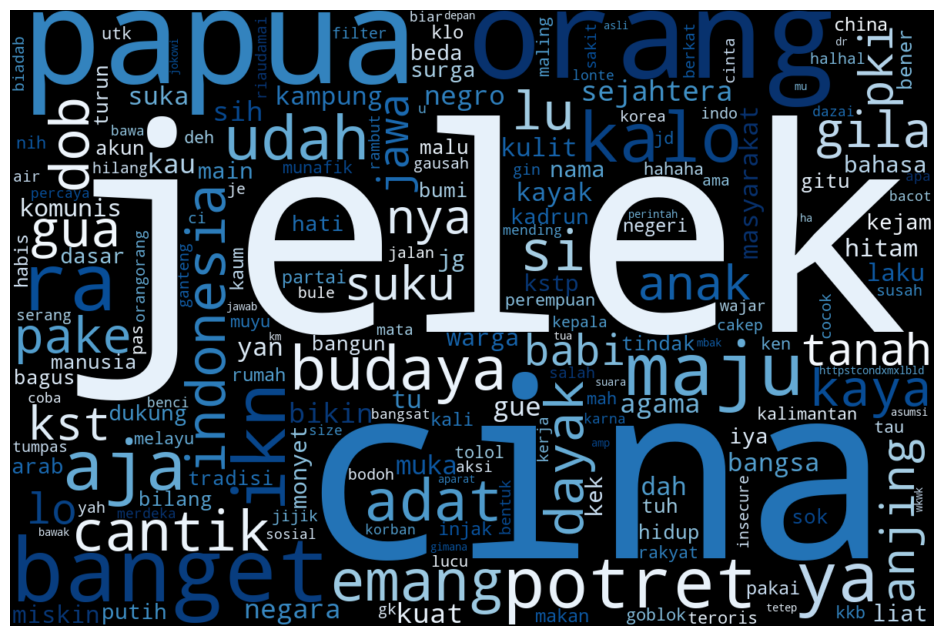

In [85]:
from wordcloud.wordcloud import WordCloud


def showing(wc):
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show 

allword = "".join([str(text).replace("'", "") for text in df.comment[df.label == "Ras"]])

word_cloud = WordCloud(
    height=800,
    width=1200,
    collocations=False,
    colormap="Blues_r"
).generate(allword)

showing(word_cloud)

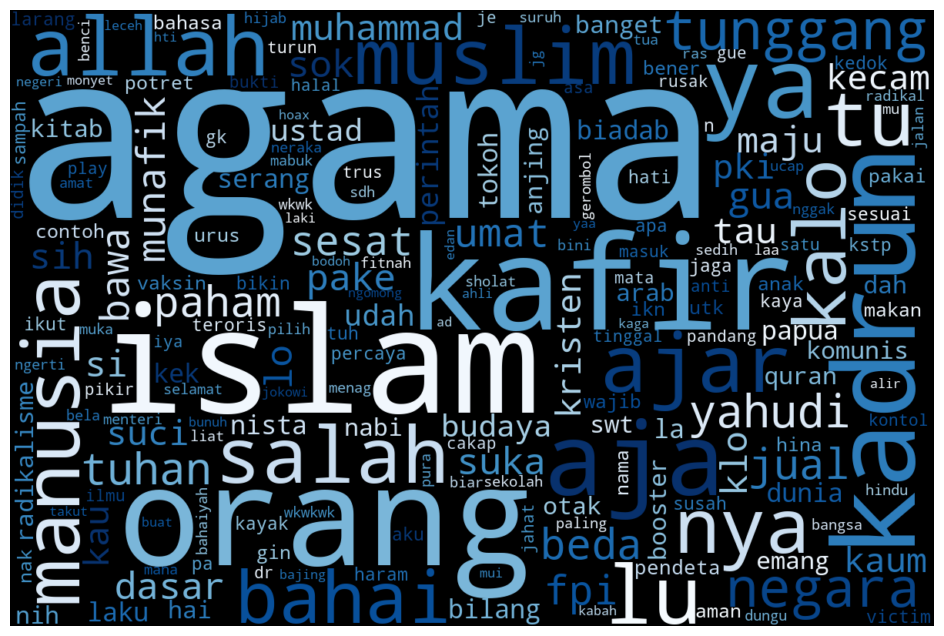

In [86]:
from wordcloud.wordcloud import WordCloud


def showing(wc):
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show 

allword = "".join([str(text).replace("'", "") for text in df.comment[df.label == "Agama"]])

word_cloud = WordCloud(
    height=800,
    width=1200,
    collocations=False,
    colormap="Blues_r"
).generate(allword)

showing(word_cloud)

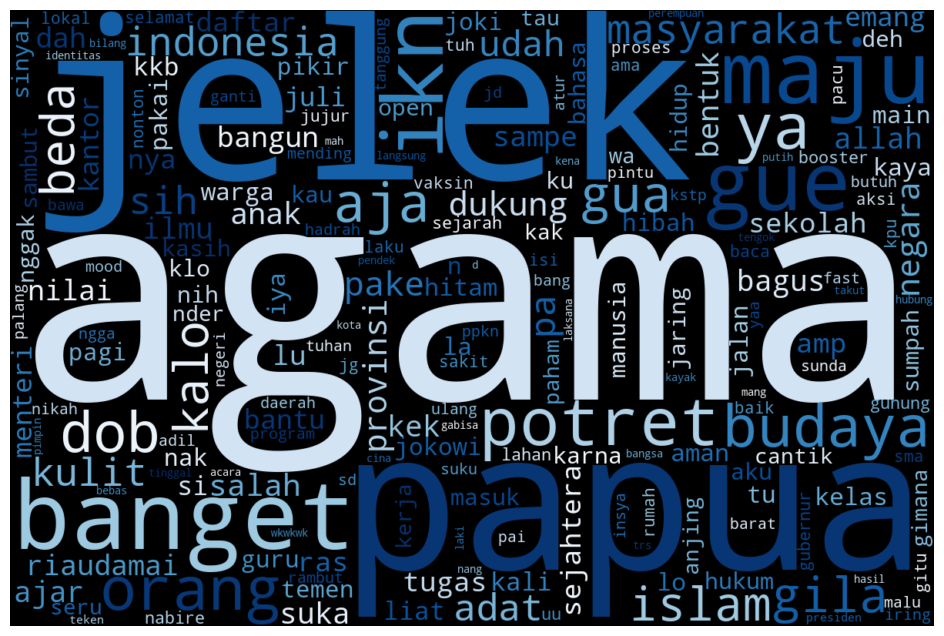

In [89]:
from wordcloud.wordcloud import WordCloud


def showing(wc):
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show 

allword = "".join([str(text).replace("'", "") for text in df.comment[df.label == "Netral"]])

word_cloud = WordCloud(
    height=800,
    width=1200,
    collocations=False,
    colormap="Blues_r"
).generate(allword)

showing(word_cloud)

# **Pembobotan Kata**

In [102]:
combined_text = [" ".join(text) for text in df.comment]
sentences = []
word_set = []
 
for sent in combined_text:
    x = [i for i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
 
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1


word_set
            

{'awas',
 'tai',
 'bnb',
 'beli',
 'lepadtu',
 'krisantus',
 'tokoh',
 'httpstconwnvuyeu',
 'vaksin',
 'bansernya',
 'surau',
 'victim',
 'haduhhhhhh',
 'ketawaketiwi',
 'httpstconjumobfes',
 'untunga',
 'httpstcohmsaouoyw',
 'individu',
 'plus',
 'pcnya',
 'bolong',
 'jalan',
 'kuantitas',
 'dear',
 'gue',
 'perak',
 'httpstcoikpmdzfui',
 'kyk',
 'tujuh',
 'bts',
 'busuk',
 'giur',
 'yakin',
 'httpstcovjvcccrtx',
 'little',
 'httpstcokzfpqbeds',
 'bersopel',
 'awal',
 'manjur',
 'bedain',
 'syukur',
 'httpstcopvtnddektm',
 'pecat',
 'jemaah',
 'frasa',
 'yoshi',
 'nulis',
 'ntt',
 'vp',
 'fantastis',
 'httpstcoqawfjeqsfq',
 'neng',
 'perkara',
 'httpstcocudawetmj',
 'investasi',
 'protesprotes',
 'pu',
 'httpstcoyyhatndqr',
 'httpstcoxspubl',
 'bahan',
 'minskin',
 'zikir',
 'ba',
 'angkuh',
 'httpstcogqbdmdqjg',
 'kosong',
 'borneo',
 'ttd',
 'jorok',
 'bukain',
 'avatar',
 'kemeja',
 'desa',
 'gede',
 'sangkut',
 'jelata',
 'duda',
 'httpstcoublfbvor',
 'unifi',
 'aje',
 'perdana',


In [103]:
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count

word_count = count_dict(sentences)
word_count


{'awas': 2,
 'tai': 1,
 'bnb': 1,
 'beli': 7,
 'lepadtu': 1,
 'krisantus': 1,
 'tokoh': 15,
 'httpstconwnvuyeu': 1,
 'vaksin': 18,
 'bansernya': 2,
 'surau': 1,
 'victim': 8,
 'haduhhhhhh': 1,
 'ketawaketiwi': 1,
 'httpstconjumobfes': 1,
 'untunga': 1,
 'httpstcohmsaouoyw': 1,
 'individu': 1,
 'plus': 3,
 'pcnya': 1,
 'bolong': 2,
 'jalan': 20,
 'kuantitas': 1,
 'dear': 2,
 'gue': 61,
 'perak': 1,
 'httpstcoikpmdzfui': 3,
 'kyk': 6,
 'tujuh': 1,
 'bts': 1,
 'busuk': 3,
 'giur': 1,
 'yakin': 3,
 'httpstcovjvcccrtx': 1,
 'little': 1,
 'httpstcokzfpqbeds': 1,
 'bersopel': 1,
 'awal': 1,
 'manjur': 1,
 'bedain': 1,
 'syukur': 5,
 'httpstcopvtnddektm': 2,
 'pecat': 1,
 'jemaah': 1,
 'frasa': 2,
 'yoshi': 1,
 'nulis': 3,
 'ntt': 1,
 'vp': 1,
 'fantastis': 1,
 'httpstcoqawfjeqsfq': 1,
 'neng': 4,
 'perkara': 4,
 'httpstcocudawetmj': 1,
 'investasi': 1,
 'protesprotes': 1,
 'pu': 2,
 'httpstcoyyhatndqr': 1,
 'httpstcoxspubl': 1,
 'bahan': 5,
 'minskin': 1,
 'zikir': 1,
 'ba': 5,
 'angkuh': 2,


### **Term Frequency**

In [104]:
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token==word])
    return occurance/N



### **Inverse Document Frequently**

In [105]:
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)



### **TF-IDF**

In [106]:
def tfidf_func(sentences):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentences:
        tf = termfreq(sentences, word)
        idf = inverse_doc_freq(word)

        value = tf*idf 
        tf_idf_vec[index_dict[word]] = value
    return tf_idf_vec

In [107]:
len(word_set)

6058

In [108]:
vectors = []
for sent in sentences:
    vec = tfidf_func(sent)
    vectors.append(vec)

tf_idf = pd.DataFrame(vectors, columns=list(word_set))
tf_idf

,awas,tai,bnb,beli,lepadtu,krisantus,tokoh,httpstconwnvuyeu,vaksin,bansernya,...,dewasa,ambil,tongyg,httpstcowkvsfcyz,kasta,kadal,uwu,wat,jelekdia,lempar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
tf_idf.awas.mean()

0.0011146783150069665

### **Feature Selection** 

In [111]:
uncommon_word = []
index_word = []
for i, col in enumerate(tf_idf.columns):
    if tf_idf[col].mean() < 0.1:
        index_word.append(i)
        uncommon_word.append(col)

uncommon_word

['awas',
 'tai',
 'bnb',
 'beli',
 'lepadtu',
 'krisantus',
 'tokoh',
 'httpstconwnvuyeu',
 'vaksin',
 'bansernya',
 'surau',
 'victim',
 'haduhhhhhh',
 'ketawaketiwi',
 'httpstconjumobfes',
 'untunga',
 'httpstcohmsaouoyw',
 'individu',
 'plus',
 'pcnya',
 'bolong',
 'jalan',
 'kuantitas',
 'dear',
 'gue',
 'perak',
 'httpstcoikpmdzfui',
 'kyk',
 'tujuh',
 'bts',
 'busuk',
 'giur',
 'yakin',
 'httpstcovjvcccrtx',
 'little',
 'httpstcokzfpqbeds',
 'bersopel',
 'awal',
 'manjur',
 'bedain',
 'syukur',
 'httpstcopvtnddektm',
 'pecat',
 'jemaah',
 'frasa',
 'yoshi',
 'nulis',
 'ntt',
 'vp',
 'fantastis',
 'httpstcoqawfjeqsfq',
 'neng',
 'perkara',
 'httpstcocudawetmj',
 'investasi',
 'protesprotes',
 'pu',
 'httpstcoyyhatndqr',
 'httpstcoxspubl',
 'bahan',
 'minskin',
 'zikir',
 'ba',
 'angkuh',
 'httpstcogqbdmdqjg',
 'kosong',
 'borneo',
 'ttd',
 'jorok',
 'bukain',
 'avatar',
 'kemeja',
 'desa',
 'gede',
 'sangkut',
 'jelata',
 'duda',
 'httpstcoublfbvor',
 'unifi',
 'aje',
 'perdana',
